2. Olympic games data
In this exercise we'll explore the olympic games data 120 years back in time to see if we can find anything interesting. Many things that we can do in pandas can be done much faster and simpler by using duckdb, so lets use duckdb in this exercise.

We will not create a separate duckdb database in this exercise, instead we'll query a pandas dataframe directly and return a dataframe.

  a) Start with reading in the dataset into a dataframe using pandas.

  b) Now here is the code for using duckdb on pandas and it will return a df

query(SELECT * FROM df).df()
Note

By combining both pandas and duckdb you will have immense powers and flexibility.

  c) Use pandas columns method to find out the columns

  d) Find out the 10 oldest atheletes, their age and the sport

  e) Find out the 10 youngest atheletes, their age and the sport

  e) Find out the five sports with highest median age

  f) Find out the five sports with lowest median age

  f) Find out top 10 countries after number of gold medals

  g) Find out top 10 countries after number of medals

  h) Plot a time series line chart of number of female and male atheletes in same graph.

  i) Do more explorations on your own

In [2]:
import pandas as pd

df = pd.read_csv("data/athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


b) Now here is the code for using duckdb on pandas and it will return a df

query(SELECT * FROM df).df()

In [3]:
import duckdb

duckdb_q = duckdb.query("select * from df limit 5;").df()

duckdb_q

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


  c) Use pandas columns method to find out the columns

In [4]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

d) Find out the 10 oldest atheletes, their age and the sport

In [5]:
# pandas 

sorted_df =df.sort_values(by="Age",ascending=False).head(10)
oldest10_age = sorted_df[["Age","Sport"]]

oldest10_age

,Age,Sport
257054,97.0,Art Competitions
98118,96.0,Art Competitions
60863,88.0,Art Competitions
60861,88.0,Art Competitions
60862,88.0,Art Competitions
9371,84.0,Art Competitions
236912,81.0,Art Competitions
154855,81.0,Art Competitions
138812,80.0,Art Competitions
138813,80.0,Art Competitions


 e) Find out the 10 youngest atheletes, their age and the sport

In [6]:
# SQL
query = """
select ID, Age, Sport from df order by Age asc limit 10;
"""
youngest10_age = duckdb.query(query).df()
youngest10_age

,ID,Age,Sport
0,71691,10.0,Gymnastics
1,118925,11.0,Figure Skating
2,126307,11.0,Swimming
3,126307,11.0,Swimming
4,126307,11.0,Swimming
5,126307,11.0,Swimming
6,52070,11.0,Figure Skating
7,70616,11.0,Figure Skating
8,76675,11.0,Figure Skating
9,22411,11.0,Figure Skating


 e) Find out the five sports with highest median age


In [7]:
# Pandas

top5_sport = df.groupby("Sport")["Age"].median().sort_values(ascending=False).iloc[:5]
top5_sport

Sport
Roque               59.0
Art Competitions    45.0
Alpinism            38.0
Polo                35.0
Equestrianism       33.0
Name: Age, dtype: float64

  f) Find out the five sports with lowest median age

In [8]:
# SQL

query = """
select Sport, median(Age) m_age from df group by Sport order by m_age limit 5;
"""

low5_sport = duckdb.query(query).df()
low5_sport

,Sport,m_age
0,Rhythmic Gymnastics,18.0
1,Swimming,20.0
2,Figure Skating,22.0
3,Diving,22.0
4,Gymnastics,22.0


  f) Find out top 10 countries after number of gold medals


In [9]:
# pandas
cleaned_df = df.query("Medal == 'Gold'")
top10_gold = cleaned_df.groupby("Team")["Medal"].count().sort_values(ascending=False).iloc[:10]
top10_gold

Team
United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
France            455
Sweden            451
Hungary           432
Canada            422
East Germany      369
Name: Medal, dtype: int64


  g) Find out top 10 countries after number of medals

In [10]:
# SQL

query = """
select Team, count(Medal) as sum_medal 
from df 
where Medal IS NOT NULL
group by Team 
order by sum_medal desc 
limit 10;
"""

top10_medals = duckdb.query(query).df()
top10_medals

,Team,sum_medal
0,United States,5219
1,Soviet Union,2451
2,Germany,1984
3,Great Britain,1673
4,France,1550
5,Italy,1527
6,Sweden,1434
7,Australia,1306
8,Canada,1243
9,Hungary,1127


In [11]:
# 得金牌 得国家排名，SQL

# query = """
# select Team, count(Medal) as sum_medal 
# from df 
# where lower(trim(Medal)) = 'gold'       # Gold 左右应该有空字符
# group by Team 
# order by sum_medal desc 
# limit 10;
# """

# top10_medals = duckdb.query(query).df()
# top10_medals

  h) Plot a time series line chart of number of female and male atheletes in same graph.   
  在同一张图表中绘制女性和男性运动员人数的时间序列折线图。 

  - Age，Sex

In [12]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 按照 "Year" 和 "Sex" 列进行分组，计算每年每种性别的运动员数量
# size() 返回每个分组的大小，reset_index() 会将结果转为 DataFrame，并为新列命名为 "Count"。

gender_count_per_year = df.groupby(["Year", "Sex"]).size().reset_index(name="Count")
gender_count_per_year.head()

,Year,Sex,Count
0,1896,M,380
1,1900,F,33
2,1900,M,1903
3,1904,F,16
4,1904,M,1285


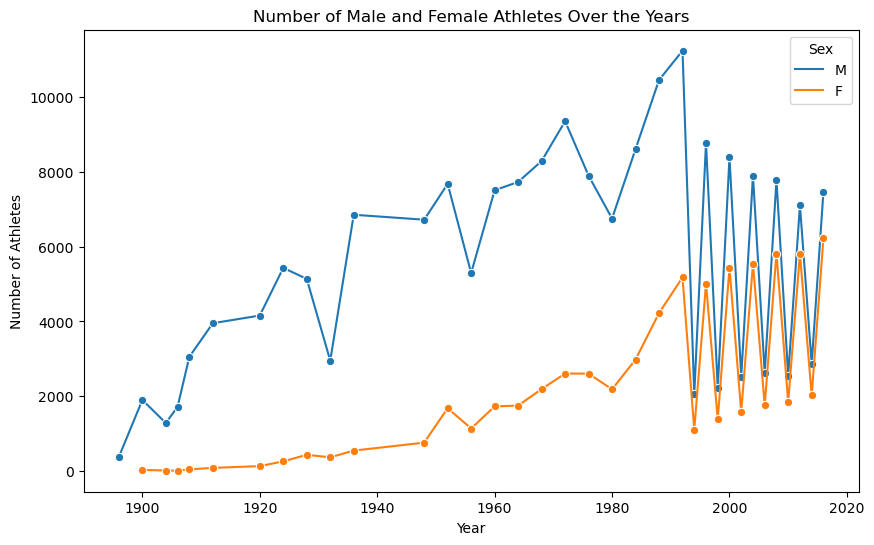

In [27]:
# 2. 使用 Seaborn 绘制分类折线图

plt.figure(figsize=(10, 6))
sns.lineplot(data=gender_count_per_year, x="Year", y="Count", hue="Sex", marker="o")

# 3. 设置图表标题和标签 - matplotlib
plt.title("Number of Male and Female Athletes Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.legend(title="Sex")

# 显示图表（可选）- matplotlib
plt.show()

# plt.figure() 是 matplotlib 中的一个函数， 创建画布。一个元组 (宽度, 高度)，单位是 英寸（inches
# hue="Sex"：根据性别进行颜色区分，男性和女性使用不同的颜色表示。
# marker="o"：每个数据点上会显示一个圆点（可选）。
# plt.legend(title="Sex")：显示图例，并给图例添加标题 "Sex"，用于区分男性和女性。